In [28]:
import pandas as pd
import numpy as np
from sklearn.cluster import AffinityPropagation

In [40]:
X=pd.read_csv('/Users/ishaan/Summer_Project/data/standardised_returns_for_clustering.csv')
X

,Unnamed: 0,1 month return,2 month return,3 month return,4 month return,5 month return,6 month return,7 month return,8 month return,9 month return,...,39 month return,40 month return,41 month return,42 month return,43 month return,44 month return,45 month return,46 month return,47 month return,48 month return
0,M&M.NS,-1.384424,-0.996066,-0.738768,-1.125748,-0.988950,-0.897808,-0.817820,-0.511666,-0.233093,...,0.815749,1.570563,1.157357,1.414462,2.376737,2.159518,1.903908,1.986069,1.568013,1.711501
1,MARUTI.NS,-0.672422,-0.597123,-0.519661,-0.641786,-0.739835,-0.674586,-0.825302,-0.837314,-0.777890,...,0.375786,0.871781,1.110038,1.230481,1.618054,2.015589,2.407484,2.420265,2.396844,2.850364
2,NESTLEIND.NS,-1.837215,-1.647041,-1.236242,-1.150345,-1.087212,-0.761207,-0.723692,-0.900924,-0.911597,...,-0.067594,0.222375,0.180649,0.445827,1.647806,1.580328,1.966212,1.895138,2.147778,3.122859
3,NTPC.NS,0.558244,2.142048,1.406346,0.449254,1.719697,0.983999,0.520779,0.463060,1.257035,...,-2.297525,1.009254,0.687190,-0.147935,-0.590169,-0.461220,0.373132,-0.188162,-0.089554,-0.116103
4,POWERGRID.NS,-1.039774,-0.865926,-0.709753,-0.916017,-0.418039,-0.677342,-0.966109,-0.993617,-0.611533,...,-0.171895,0.853885,1.942983,1.556734,1.309786,1.778222,2.452904,2.254657,1.954087,2.593596
5,RELIANCE.NS,0.787136,1.636986,0.982444,0.750939,0.211658,-0.501488,-0.959904,-0.699613,-0.000112,...,0.829287,2.274291,1.758232,1.664546,1.583421,1.028630,1.602785,1.509100,0.457616,0.709888
6,SBIN.NS,0.831372,1.137817,1.227125,0.144111,0.389759,0.251971,-0.602158,-0.746623,-0.757558,...,-0.133859,1.019644,1.368900,0.769829,0.821854,0.785473,1.409040,2.648901,2.417275,2.346940
7,SUNPHARMA.NS,-1.200376,-1.156236,-1.102222,-1.075041,-1.027532,-0.980371,-1.042168,-1.102067,-1.003911,...,0.809250,0.704468,1.070139,1.557387,1.861561,1.878113,1.821959,1.794947,1.732631,2.164812
8,TATAMOTORS.NS,-0.954608,-0.672381,-0.691980,-0.933220,-1.105522,-1.151603,-1.509394,-1.443417,-1.074847,...,0.895359,0.898032,1.042813,1.197477,1.898083,1.693180,1.994718,1.973690,1.634125,2.435840
9,TATASTEEL.NS,1.652509,1.808081,1.748840,1.465516,1.684448,1.326072,0.322689,-0.236558,0.472484,...,-0.132555,0.698115,1.292805,1.697265,1.239049,0.623161,0.975503,0.785956,-0.055909,-0.157797


In [41]:
for i in range (1,49):
    s= str(i)+' month return'
    X= X.rename({s: i}, axis=1)
X

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,M&M.NS,-1.384424,-0.996066,-0.738768,-1.125748,-0.988950,-0.897808,-0.817820,-0.511666,-0.233093,...,0.815749,1.570563,1.157357,1.414462,2.376737,2.159518,1.903908,1.986069,1.568013,1.711501
1,MARUTI.NS,-0.672422,-0.597123,-0.519661,-0.641786,-0.739835,-0.674586,-0.825302,-0.837314,-0.777890,...,0.375786,0.871781,1.110038,1.230481,1.618054,2.015589,2.407484,2.420265,2.396844,2.850364
2,NESTLEIND.NS,-1.837215,-1.647041,-1.236242,-1.150345,-1.087212,-0.761207,-0.723692,-0.900924,-0.911597,...,-0.067594,0.222375,0.180649,0.445827,1.647806,1.580328,1.966212,1.895138,2.147778,3.122859
3,NTPC.NS,0.558244,2.142048,1.406346,0.449254,1.719697,0.983999,0.520779,0.463060,1.257035,...,-2.297525,1.009254,0.687190,-0.147935,-0.590169,-0.461220,0.373132,-0.188162,-0.089554,-0.116103
4,POWERGRID.NS,-1.039774,-0.865926,-0.709753,-0.916017,-0.418039,-0.677342,-0.966109,-0.993617,-0.611533,...,-0.171895,0.853885,1.942983,1.556734,1.309786,1.778222,2.452904,2.254657,1.954087,2.593596
5,RELIANCE.NS,0.787136,1.636986,0.982444,0.750939,0.211658,-0.501488,-0.959904,-0.699613,-0.000112,...,0.829287,2.274291,1.758232,1.664546,1.583421,1.028630,1.602785,1.509100,0.457616,0.709888
6,SBIN.NS,0.831372,1.137817,1.227125,0.144111,0.389759,0.251971,-0.602158,-0.746623,-0.757558,...,-0.133859,1.019644,1.368900,0.769829,0.821854,0.785473,1.409040,2.648901,2.417275,2.346940
7,SUNPHARMA.NS,-1.200376,-1.156236,-1.102222,-1.075041,-1.027532,-0.980371,-1.042168,-1.102067,-1.003911,...,0.809250,0.704468,1.070139,1.557387,1.861561,1.878113,1.821959,1.794947,1.732631,2.164812
8,TATAMOTORS.NS,-0.954608,-0.672381,-0.691980,-0.933220,-1.105522,-1.151603,-1.509394,-1.443417,-1.074847,...,0.895359,0.898032,1.042813,1.197477,1.898083,1.693180,1.994718,1.973690,1.634125,2.435840
9,TATASTEEL.NS,1.652509,1.808081,1.748840,1.465516,1.684448,1.326072,0.322689,-0.236558,0.472484,...,-0.132555,0.698115,1.292805,1.697265,1.239049,0.623161,0.975503,0.785956,-0.055909,-0.157797


In [42]:
curr = X.columns[0]
X.rename(columns={curr: 'Stocks'}, inplace=True)

In [43]:
X = X.set_index('Stocks')
X

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
Stocks,,,,,,,,,,,,,,,,,,,,,
M&M.NS,-1.384424,-0.996066,-0.738768,-1.125748,-0.988950,-0.897808,-0.817820,-0.511666,-0.233093,-0.877351,...,0.815749,1.570563,1.157357,1.414462,2.376737,2.159518,1.903908,1.986069,1.568013,1.711501
MARUTI.NS,-0.672422,-0.597123,-0.519661,-0.641786,-0.739835,-0.674586,-0.825302,-0.837314,-0.777890,-0.993037,...,0.375786,0.871781,1.110038,1.230481,1.618054,2.015589,2.407484,2.420265,2.396844,2.850364
NESTLEIND.NS,-1.837215,-1.647041,-1.236242,-1.150345,-1.087212,-0.761207,-0.723692,-0.900924,-0.911597,-0.939151,...,-0.067594,0.222375,0.180649,0.445827,1.647806,1.580328,1.966212,1.895138,2.147778,3.122859
NTPC.NS,0.558244,2.142048,1.406346,0.449254,1.719697,0.983999,0.520779,0.463060,1.257035,0.100293,...,-2.297525,1.009254,0.687190,-0.147935,-0.590169,-0.461220,0.373132,-0.188162,-0.089554,-0.116103
POWERGRID.NS,-1.039774,-0.865926,-0.709753,-0.916017,-0.418039,-0.677342,-0.966109,-0.993617,-0.611533,-0.954811,...,-0.171895,0.853885,1.942983,1.556734,1.309786,1.778222,2.452904,2.254657,1.954087,2.593596
RELIANCE.NS,0.787136,1.636986,0.982444,0.750939,0.211658,-0.501488,-0.959904,-0.699613,-0.000112,-1.003875,...,0.829287,2.274291,1.758232,1.664546,1.583421,1.028630,1.602785,1.509100,0.457616,0.709888
SBIN.NS,0.831372,1.137817,1.227125,0.144111,0.389759,0.251971,-0.602158,-0.746623,-0.757558,-1.088735,...,-0.133859,1.019644,1.368900,0.769829,0.821854,0.785473,1.409040,2.648901,2.417275,2.346940
SUNPHARMA.NS,-1.200376,-1.156236,-1.102222,-1.075041,-1.027532,-0.980371,-1.042168,-1.102067,-1.003911,-0.954658,...,0.809250,0.704468,1.070139,1.557387,1.861561,1.878113,1.821959,1.794947,1.732631,2.164812
TATAMOTORS.NS,-0.954608,-0.672381,-0.691980,-0.933220,-1.105522,-1.151603,-1.509394,-1.443417,-1.074847,-1.297814,...,0.895359,0.898032,1.042813,1.197477,1.898083,1.693180,1.994718,1.973690,1.634125,2.435840


In [44]:

ap = AffinityPropagation()
ap.fit(X)
labels = ap.predict(X)

In [45]:
groups = []
for i in range(labels.max()+1):
    arr = []
    for j in range(len(labels)):
        if labels[j] == i:
            arr.append(X.index[j])
    groups.append(arr)

In [46]:
for i in range(len(groups)):
    print("Group", i+1, ":", groups[i])

Group 1 : ['NTPC.NS']
Group 2 : ['RELIANCE.NS', 'JSWSTEEL.NS']
Group 3 : ['TATASTEEL.NS']
Group 4 : ['SUNPHARMA.NS', 'TATAMOTORS.NS', 'TCS.NS', 'TECHM.NS', 'WIPRO.NS', 'HCLTECH.NS', 'INFY.NS']
Group 5 : ['MARUTI.NS', 'POWERGRID.NS', 'SBIN.NS', 'AXISBANK.NS', 'ICICIBANK.NS']
Group 6 : ['BHARTIARTL.NS']
Group 7 : ['M&M.NS', 'NESTLEIND.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'ASIANPAINT.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'INDUSINDBK.NS', 'ITC.NS', 'KOTAKBANK.NS']


In [47]:
import matplotlib.pyplot as plt

In [48]:
 # set column as index
X = X.T 

In [49]:
X

Stocks,M&M.NS,MARUTI.NS,NESTLEIND.NS,NTPC.NS,POWERGRID.NS,RELIANCE.NS,SBIN.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,...,BHARTIARTL.NS,HCLTECH.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INDUSINDBK.NS,INFY.NS,ITC.NS,JSWSTEEL.NS,KOTAKBANK.NS
1,-1.384424,-0.672422,-1.837215,0.558244,-1.039774,0.787136,0.831372,-1.200376,-0.954608,1.652509,...,-0.276864,-0.972943,-1.480467,-1.564423,-0.617100,-1.278921,-0.138109,-1.787536,0.012255,-1.268604
2,-0.996066,-0.597123,-1.647041,2.142048,-0.865926,1.636986,1.137817,-1.156236,-0.672381,1.808081,...,0.363057,-0.900486,-1.118646,-1.534180,-0.141167,-0.995376,0.264426,-1.599770,0.220833,-1.032948
3,-0.738768,-0.519661,-1.236242,1.406346,-0.709753,0.982444,1.227125,-1.102222,-0.691980,1.748840,...,0.918391,-0.808094,-1.180634,-1.545447,-0.146897,-1.019616,-0.287865,-1.452855,0.365254,-1.156801
4,-1.125748,-0.641786,-1.150345,0.449254,-0.916017,0.750939,0.144111,-1.075041,-0.933220,1.465516,...,0.773734,-0.821208,-1.052468,-1.430700,-0.239726,-0.992505,-0.453490,-1.438522,0.492669,-1.106144
5,-0.988950,-0.739835,-1.087212,1.719697,-0.418039,0.211658,0.389759,-1.027532,-1.105522,1.684448,...,1.282485,-0.862289,-0.888038,-1.198832,-0.164863,-0.929086,-0.246286,-1.276098,0.071427,-0.936990
6,-0.897808,-0.674586,-0.761207,0.983999,-0.677342,-0.501488,0.251971,-0.980371,-1.151603,1.326072,...,2.320823,-0.878578,-0.989233,-1.295118,-0.356930,-0.934226,-0.469678,-1.198038,-0.380074,-1.088017
7,-0.817820,-0.825302,-0.723692,0.520779,-0.966109,-0.959904,-0.602158,-1.042168,-1.509394,0.322689,...,1.546661,-1.029689,-1.081370,-1.316693,-0.899294,-1.092298,-1.188501,-1.318742,-0.815520,-1.098516
8,-0.511666,-0.837314,-0.900924,0.463060,-0.993617,-0.699613,-0.746623,-1.102067,-1.443417,-0.236558,...,0.891599,-1.037680,-1.108049,-1.195642,-0.892162,-0.991737,-0.872879,-1.347654,-1.211882,-1.022563
9,-0.233093,-0.777890,-0.911597,1.257035,-0.611533,-0.000112,-0.757558,-1.003911,-1.074847,0.472484,...,1.230807,-0.962348,-0.969378,-0.984703,-0.707227,-0.834629,-0.274491,-1.128651,-0.929095,-0.787110
10,-0.877351,-0.993037,-0.939151,0.100293,-0.954811,-1.003875,-1.088735,-0.954658,-1.297814,-0.553499,...,1.090700,-1.085782,-1.264092,-0.834769,-1.432701,-1.077198,-0.726418,-1.308623,-1.206594,-0.991289


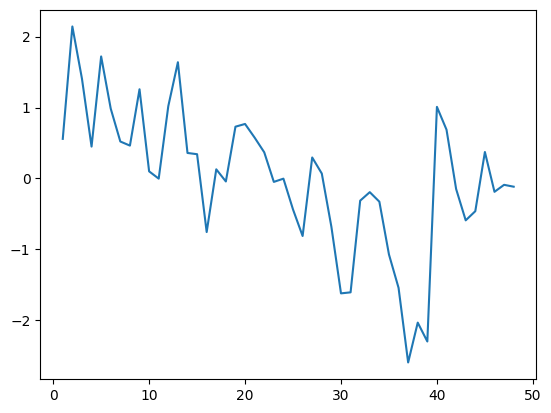

In [50]:
for j in range (len(groups[0])):
    plt.plot(X[groups[0][j]])

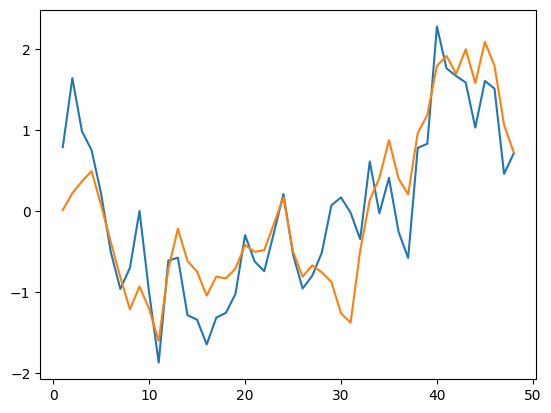

In [51]:
for j in range (len(groups[1])):
    plt.plot(X[groups[1][j]])

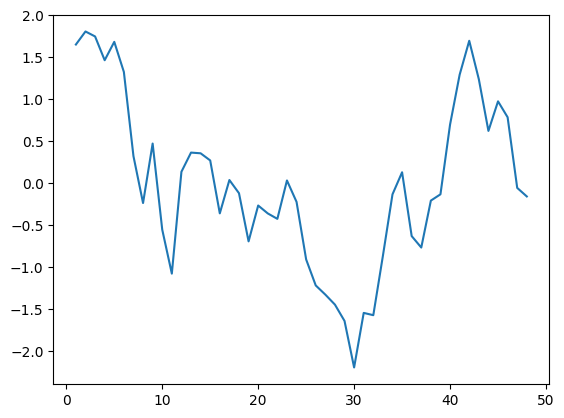

In [52]:
for j in range (len(groups[2])):
    plt.plot(X[groups[2][j]])

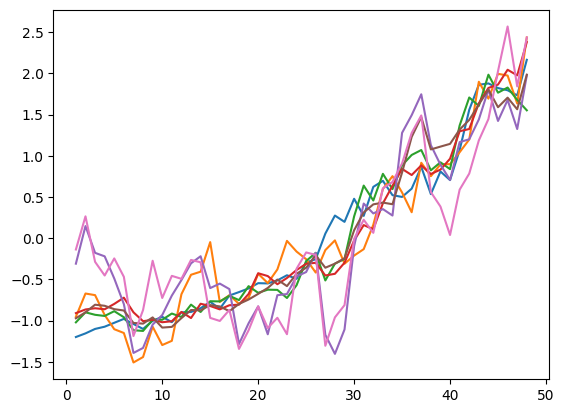

In [53]:
for j in range (len(groups[3])):
    plt.plot(X[groups[3][j]])

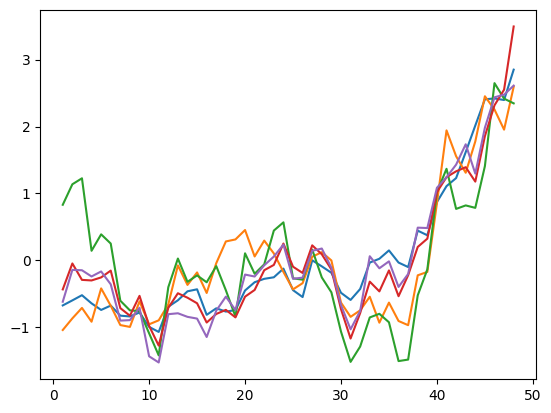

In [54]:
for j in range (len(groups[4])):
    plt.plot(X[groups[4][j]])

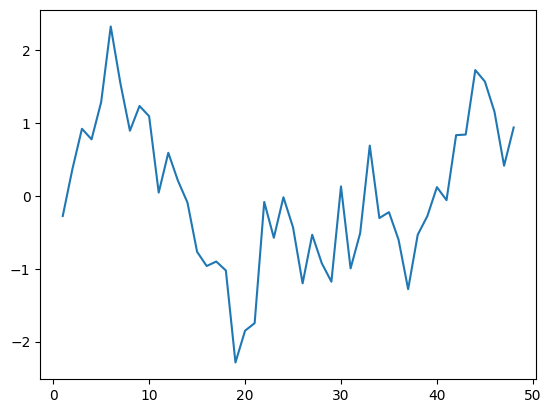

In [55]:
for j in range (len(groups[5])):
    plt.plot(X[groups[5][j]])

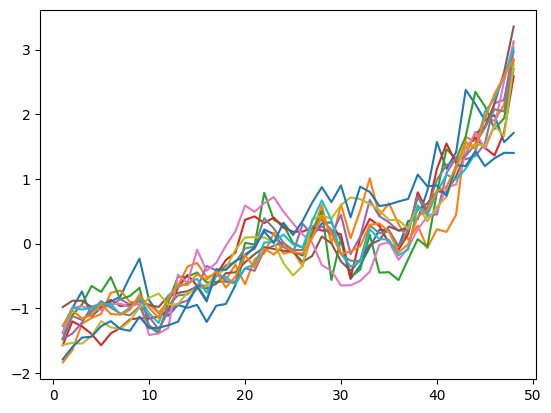

In [56]:
for j in range (len(groups[6])):
    plt.plot(X[groups[6][j]])